In [1]:
import imutils
import numpy as np
import pickle
import cv2
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/haar-face-detection/haar-face-detection.zip
!unzip -qq haar-face-detection.zip
%cd haar-face-detection

--2022-12-06 04:00:31--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/haar-face-detection/haar-face-detection.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.220.193, 52.218.250.9, 52.92.131.106, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.220.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2184692 (2.1M) [application/zip]
Saving to: ‘haar-face-detection.zip’

haar-face-detection 100%[===================>]   2.08M  4.20MB/s    in 0.5s    

2022-12-06 04:00:32 (4.20 MB/s) - ‘haar-face-detection.zip’ saved [2184692/2184692]

/content/haar-face-detection


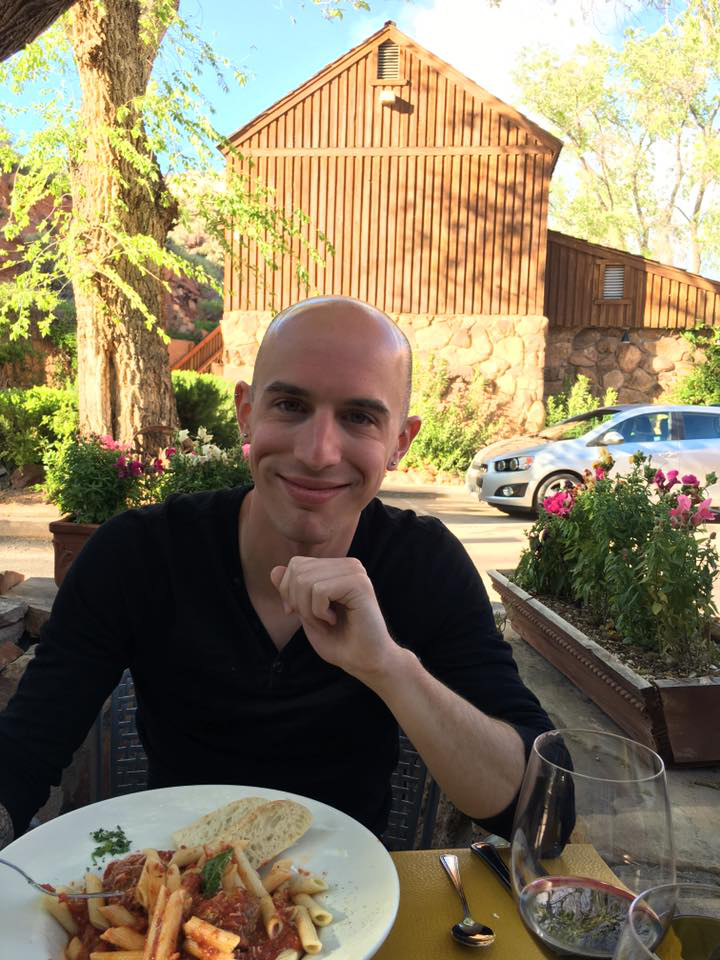

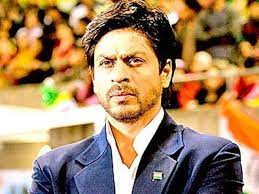

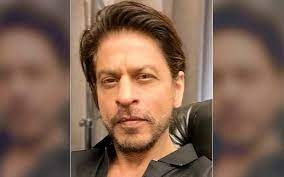

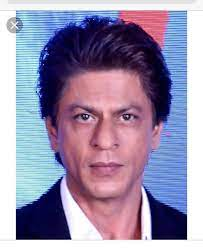

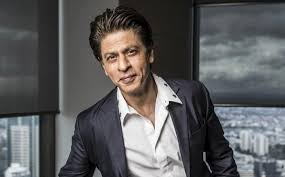

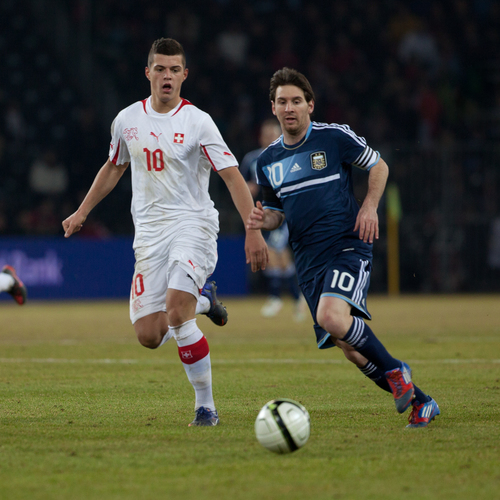

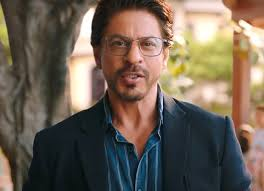

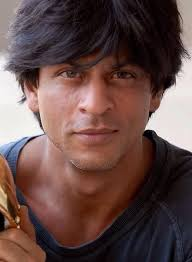

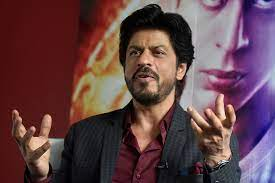

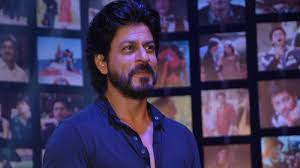

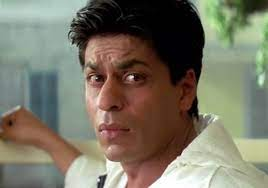

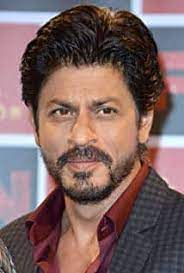

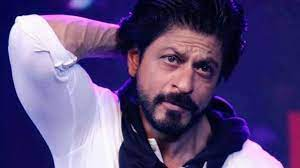

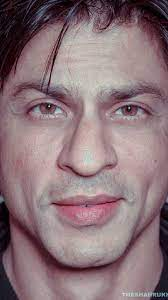

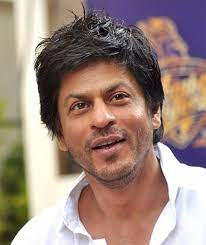

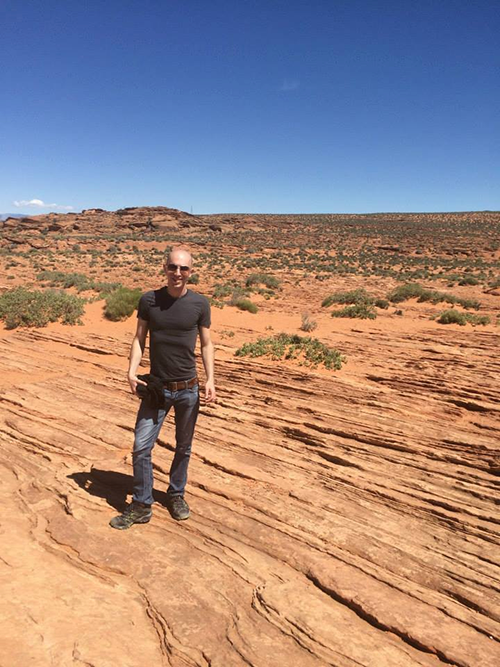

In [3]:
people = ['images']
DIR = r'/content/haar-face-detection/'
features = []
labels = []

def create_train():
  for person in people:
    path = os.path.join(DIR, person)
    label = people.index(person)

    for img in os.listdir(path):
      # cv2_imshow(img)
      img_path = os.path.join(path,img)
      img_array = cv2.imread(img_path)
      cv2_imshow(img_array)
      gray = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
      face_cascade = cv2.CascadeClassifier('/content/haar-face-detection/haarcascade_frontalface_default.xml')
      faces_rect = face_cascade.detectMultiScale(gray, 1.1, 3)
      for(x,y,w,h) in faces_rect:
        faces_roi = gray[y:y+h, x:x+w]
        features.append(faces_roi)
        labels.append(label)

create_train()

In [4]:
features = np.array(features, dtype = 'object')
labels = np.array(labels)
haar_cascade = cv2.CascadeClassifier('/content/haar-face-detection/haarcascade_frontalface_default.xml')
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

face_recognizer.train(features,labels)
face_recognizer.save('face_traines.yml')

In [5]:
np.save('features.npy',features)
np.save('labels.npy',labels)

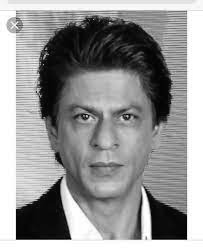

In [6]:
img = cv2.imread('/content/haar-face-detection/images/download (6).jpeg')


gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 3)

In [7]:
for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h,x:x+w]

    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {people[label]} with a confidence of {confidence}')

    cv2.putText(img, str(people[label]), (20,20), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

Label = images with a confidence of 0.0


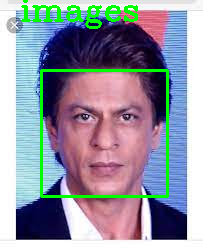

In [8]:
cv2_imshow(img)